#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('/home/cheki/Documents/GCIT/6th Semester/ITS307/imdb_top_10000.txt', delimiter = "\t" ,names=["imdbID", "title", "year", "score", "votes", "runtime", "genres"])
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [39]:
df.isnull().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [40]:
df.shape

(10000, 7)

In [41]:
df.dropna(inplace=True)
df

imdbID                            title  year  score   votes  \
0     tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479   
1     tt0110912              Pulp Fiction (1994)  1994    9.0  490065   
2     tt0137523                Fight Club (1999)  1999    8.8  458173   
3     tt0133093                The Matrix (1999)  1999    8.7  448114   
4     tt1375666                 Inception (2010)  2010    8.9  385149   
...         ...                              ...   ...    ...     ...   
9995  tt0807721                   Meduzot (2007)  2007    7.0    1357   
9996  tt0339642            Daltry Calhoun (2005)  2005    5.2    1357   
9997  tt0060880    The Quiller Memorandum (1966)  1966    6.5    1356   
9998  tt0152836                      Taal (1999)  1999    6.5    1356   
9999  tt0279977            The Navigators (2001)  2001    6.9    1356   

        runtime                            genres  
0     142 mins.                       Crime|Drama  
1     154 mins.                    Crime|Thriller  
2     139 mins.            Drama|Mystery|Thriller  
3     136 mins.           Action|Adventure|Sci-Fi  
4     148 mins.  Action|Adventure|Sci-Fi|Thriller  
...         ...                               ...  
9995   78 mins.                             Drama  
9996  100 mins.        Comedy|Drama|Music|Romance  
9997  104 mins.            Drama|Mystery|Thriller  
9998  179 mins.                   Musical|Romance  
9999   96 mins.                      Comedy|Drama  

[9999 rows x 7 columns]

In [42]:
df.isnull().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     0
dtype: int64

## 2. Asking Questions

Determining the bestt movie using the score of each movie.

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [43]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [44]:
run_time = [int(r.split(' ')[0]) for r in df.runtime]
df['runtime'] = run_time
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [45]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime      int64
genres      object
dtype: object

In [46]:
genre = df.genres[0]
genre

'Crime|Drama'

In [47]:
genre_set=set()
for genre in df.genres:
    list_genre = genre.split("|")
    genre_set.update(list_genre)
len(genre_set)


24

In [48]:
#to add columns
for genre in genre_set:
    df[genre] = [genre in row.split("|") for row in df.genres]
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  History  Family  Biography  ...  Adult  \
0                       Crime|Drama    False   False      False  ...  False   
1                    Crime|Thriller    False   False      False  ...  False   
2            Drama|Mystery|Thriller    False   False      False  ...  False   
3           Action|Adventure|Sci-Fi    False   False      False  ...  False   
4  Action|Adventure|Sci-Fi|Thriller    False   False      False  ...  False   

   Music  Reality-TV  Action  Mystery  Romance  Film-Noir    War  Sci-Fi  \
0  False       False   False    False    False      False  False   False   
1  False       False   False    False    False      False  False   False   
2  False       False   False     True    False      False  False   False   
3  False       False    True    False    False      False  False    True   
4  False       False    True    False    False      False  False    True   

   Horror  
0   False  
1   False  
2   False  
3   False  
4   False  

[5 rows x 31 columns]

In [49]:
df.drop(["genres"],axis=1, inplace=True)

In [50]:
df['title'] = [titles[0:-7] for titles in df.title]
df.head()

imdbID                     title  year  score   votes  runtime  History  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142    False   
1  tt0110912              Pulp Fiction  1994    9.0  490065      154    False   
2  tt0137523                Fight Club  1999    8.8  458173      139    False   
3  tt0133093                The Matrix  1999    8.7  448114      136    False   
4  tt1375666                 Inception  2010    8.9  385149      148    False   

   Family  Biography  Thriller  ...  Adult  Music  Reality-TV  Action  \
0   False      False     False  ...  False  False       False   False   
1   False      False      True  ...  False  False       False   False   
2   False      False      True  ...  False  False       False   False   
3   False      False     False  ...  False  False       False    True   
4   False      False      True  ...  False  False       False    True   

   Mystery  Romance  Film-Noir    War  Sci-Fi  Horror  
0    False    False      False  False   False   False  
1    False    False      False  False   False   False  
2     True    False      False  False   False   False  
3    False    False      False  False    True   False  
4    False    False      False  False    True   False  

[5 rows x 30 columns]

## 4. EDA

In [51]:
df.describe()

year        score          votes      runtime
count  9999.000000  9999.000000    9999.000000  9999.000000
mean   1993.471447     6.385989   16605.462946   103.580358
std      14.830049     1.189965   34564.883945    26.629310
min    1950.000000     1.500000    1356.000000     0.000000
25%    1986.000000     5.700000    2334.500000    93.000000
50%    1998.000000     6.600000    4981.000000   102.000000
75%    2005.000000     7.200000   15278.500000   115.000000
max    2011.000000     9.200000  619479.000000   450.000000

Text(0, 0.5, 'Number of movies')

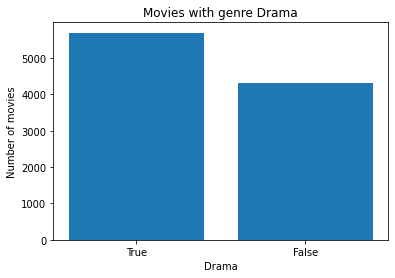

In [52]:
x=['True', 'False']
y=df.Drama.value_counts()
plt.bar(x,y)
plt.title("Movies with genre Drama")
plt.xlabel("Drama")
plt.ylabel("Number of movies")


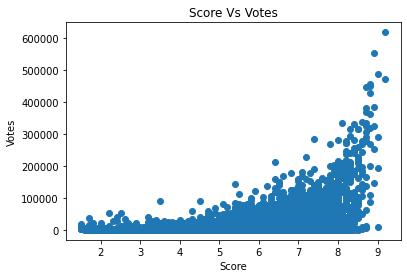

In [53]:
plt.scatter(df.score,df.votes)
plt.title("Score Vs Votes")
plt.xlabel("Score")
plt.ylabel("Votes")
plt.show()

In [71]:
yeardf = df.groupby('year', sort=False)
yeardf
year10 = yeardf[['score']].max()[-5:]

<function matplotlib.pyplot.show(close=None, block=None)>

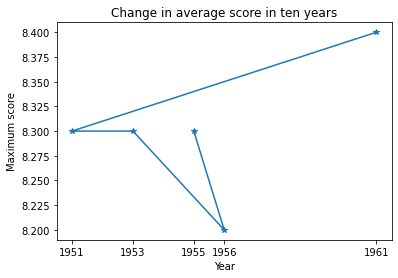

In [72]:
plt.plot(year10.index,year10.score,marker='*')
plt.xticks(year10.index)
plt.title('Change in average score in ten years')
plt.xlabel("Year")
plt.ylabel("Maximum score")
plt.show

## 5. Determining Best Movies

In [56]:
# yeardf = df.groupby('year', sort=False)
# yeardf

In [57]:
yeardf.size()

year
1994    235
1999    297
2010    315
2009    417
1993    219
       ... 
1961     43
1951     32
1953     47
1956     46
1955     53
Length: 62, dtype: int64

In [58]:
yeardf.first()

imdbID                     title  score   votes  runtime  History  \
year                                                                         
1994  tt0111161  The Shawshank Redemption    9.2  619479      142    False   
1999  tt0137523                Fight Club    8.8  458173      139    False   
2010  tt1375666                 Inception    8.9  385149      148    False   
2009  tt0499549                    Avatar    8.1  336855      162    False   
1993  tt0108052          Schindler's List    8.9  325888      195     True   
...         ...                       ...    ...     ...      ...      ...   
1961  tt0054698    Breakfast at Tiffany's    7.8   42114      115    False   
1951  tt0044079      Strangers on a Train    8.3   40104      101    False   
1953  tt0046250             Roman Holiday    8.1   36760      118    False   
1956  tt0049730             The Searchers    8.1   32502      119    False   
1955  tt0048545     Rebel Without a Cause    7.9   30491      111    False   

      Family  Biography  Thriller  Animation  ...  Adult  Music  Reality-TV  \
year                                          ...                             
1994   False      False     False      False  ...  False  False       False   
1999   False      False      True      False  ...  False  False       False   
2010   False      False      True      False  ...  False  False       False   
2009   False      False     False      False  ...  False  False       False   
1993   False       True     False      False  ...  False  False       False   
...      ...        ...       ...        ...  ...    ...    ...         ...   
1961   False      False     False      False  ...  False  False       False   
1951   False      False      True      False  ...  False  False       False   
1953   False      False     False      False  ...  False  False       False   
1956   False      False     False      False  ...  False  False       False   
1955   False      False     False      False  ...  False  False       False   

      Action  Mystery  Romance  Film-Noir    War  Sci-Fi  Horror  
year                                                              
1994   False    False    False      False  False   False   False  
1999   False     True    False      False  False   False   False  
2010    True    False    False      False  False    True   False  
2009    True    False    False      False  False    True   False  
1993   False    False    False      False   True   False   False  
...      ...      ...      ...        ...    ...     ...     ...  
1961   False    False     True      False  False   False   False  
1951   False     True     True       True  False   False   False  
1953   False    False     True      False  False   False   False  
1956   False    False    False      False  False   False   False  
1955   False    False     True      False  False   False   False  

[62 rows x 29 columns]

In [59]:
yeardf.last()

imdbID                 title  score  votes  runtime  History  Family  \
year                                                                            
1994  tt0110064         House Party 3    3.1   1357      100    False   False   
1999  tt0152836                  Taal    6.5   1356      179    False   False   
2010  tt1629391        Tere Bin Laden    7.2   1357       95    False   False   
2009  tt1281374             Don McKay    6.0   1363       87    False   False   
1993  tt0110222  Kabhi Haan Kabhi Naa    7.6   1374      158    False   False   
...         ...                   ...    ...    ...      ...      ...     ...   
1961  tt0055320              Il Posto    8.1   1379       93    False   False   
1951  tt0043643     His Kind of Woman    7.2   1474      120    False   False   
1953  tt0046000                  Lili    7.2   1376       81    False   False   
1956  tt0048937   Alexander the Great    5.9   1363      141     True   False   
1955  tt0048198        I Live in Fear    7.3   1360      103    False   False   

      Biography  Thriller  Animation  ...  Adult  Music  Reality-TV  Action  \
year                                  ...                                     
1994      False     False      False  ...  False   True       False   False   
1999      False     False      False  ...  False  False       False   False   
2010      False     False      False  ...  False  False       False   False   
2009      False      True      False  ...  False  False       False   False   
1993      False     False      False  ...  False   True       False   False   
...         ...       ...        ...  ...    ...    ...         ...     ...   
1961      False     False      False  ...  False  False       False   False   
1951      False      True      False  ...  False  False       False   False   
1953      False     False      False  ...  False  False       False   False   
1956       True     False      False  ...  False  False       False   False   
1955      False     False      False  ...  False  False       False   False   

      Mystery  Romance  Film-Noir    War  Sci-Fi  Horror  
year                                                      
1994    False     True      False  False   False   False  
1999    False     True      False  False   False   False  
2010    False    False      False  False   False   False  
2009     True    False      False  False   False   False  
1993    False     True      False  False   False   False  
...       ...      ...        ...    ...     ...     ...  
1961    False    False      False  False   False   False  
1951    False    False       True  False   False   False  
1953    False     True      False  False   False   False  
1956    False    False      False  False   False   False  
1955    False    False      False  False   False   False  

[62 rows x 29 columns]

In [60]:
yeardf.groups

{1994: [0, 1, 5, 21, 74, 248, 267, 310, 326, 345, 348, 388, 400, 477, 564, 730, 845, 910, 1016, 1159, 1296, 1373, 1414, 1456, 1467, 1476, 1480, 1610, 1718, 1724, 1758, 1847, 1876, 1881, 1981, 1986, 1999, 2038, 2071, 2072, 2106, 2117, 2190, 2196, 2225, 2284, 2297, 2355, 2404, 2425, 2446, 2461, 2500, 2531, 2586, 2702, 2744, 2762, 2962, 2966, 2994, 3030, 3110, 3136, 3212, 3226, 3252, 3253, 3311, 3385, 3406, 3440, 3473, 3481, 3487, 3538, 3558, 3592, 3598, 3615, 3684, 3708, 3711, 3762, 3778, 3815, 3817, 3909, 3926, 3970, 3999, 4013, 4042, 4043, 4047, 4051, 4104, 4112, 4199, 4227, ...], 1999: [2, 3, 6, 15, 22, 77, 150, 154, 190, 193, 197, 216, 219, 250, 264, 289, 320, 349, 378, 448, 449, 451, 462, 479, 525, 551, 601, 648, 650, 657, 658, 703, 710, 712, 725, 735, 761, 775, 793, 831, 885, 889, 966, 969, 973, 1010, 1011, 1013, 1047, 1055, 1060, 1063, 1153, 1187, 1202, 1207, 1217, 1252, 1255, 1263, 1272, 1281, 1293, 1336, 1343, 1365, 1432, 1455, 1519, 1564, 1582, 1643, 1647, 1651, 1832, 1844, 186

In [61]:
yeardf.get_group(2010).head()

imdbID           title  year  score   votes  runtime  History  Family  \
4    tt1375666       Inception  2010    8.9  385149      148    False   False   
100  tt1130884  Shutter Island  2010    8.0  171493      138    False   False   
117  tt0947798      Black Swan  2010    8.3  150346      108    False   False   
122  tt0435761     Toy Story 3  2010    8.6  144200      103    False    True   
145  tt1250777        Kick-Ass  2010    8.0  146535      117    False   False   

     Biography  Thriller  ...  Adult  Music  Reality-TV  Action  Mystery  \
4        False      True  ...  False  False       False    True    False   
100      False      True  ...  False  False       False   False     True   
117      False      True  ...  False  False       False   False     True   
122      False     False  ...  False  False       False   False    False   
145      False     False  ...  False  False       False    True    False   

     Romance  Film-Noir    War  Sci-Fi  Horror  
4      False      False  False    True   False  
100    False      False  False   False   False  
117    False      False  False   False   False  
122    False      False  False   False   False  
145    False      False  False   False   False  

[5 rows x 30 columns]

In [62]:
yeardf.max()

imdbID                                    title  score   votes  \
year                                                                      
1994  tt0145529  Yrrol - En kolossalt genomt\xe4nkt film    9.2  619479   
1999  tt0289424                                 eXistenZ    8.8  458173   
2010  tt1740707                                   Zero 2    8.9  385149   
2009  tt1569364                                  [Rec] 2    8.4  336855   
1993  tt0115819               Wrestling Ernest Hemingway    8.9  325888   
...         ...                                      ...    ...     ...   
1961  tt0055913                                  Yojimbo    8.4   42114   
1951  tt0044876                      When Worlds Collide    8.3   40104   
1953  tt0047677                                   Ugetsu    8.3   36760   
1956  tt0197521                      Written on the Wind    8.2   32502   
1955  tt0049674                          We're No Angels    8.3   30491   

      runtime  History  Family  Biography  Thriller  Animation  ...  Adult  \
year                                                            ...          
1994      450     True    True       True      True       True  ...  False   
1999      189     True    True       True      True       True  ...   True   
2010      179     True    True       True      True       True  ...   True   
2009      170     True    True       True      True       True  ...  False   
1993      261     True    True       True      True       True  ...  False   
...       ...      ...     ...        ...       ...        ...  ...    ...   
1961      186     True    True       True      True       True  ...  False   
1951      171     True    True       True      True       True  ...  False   
1953      136     True    True       True      True       True  ...  False   
1956      220     True    True       True      True      False  ...  False   
1955      181     True    True       True      True       True  ...  False   

      Music  Reality-TV  Action  Mystery  Romance  Film-Noir   War  Sci-Fi  \
year                                                                         
1994   True       False    True     True     True      False  True    True   
1999   True       False    True     True     True      False  True    True   
2010   True       False    True     True     True      False  True    True   
2009   True       False    True     True     True      False  True    True   
1993   True       False    True     True     True      False  True    True   
...     ...         ...     ...      ...      ...        ...   ...     ...   
1961  False       False    True     True     True      False  True    True   
1951  False       False    True     True     True       True  True    True   
1953   True       False    True     True     True       True  True    True   
1956   True       False    True     True     True       True  True    True   
1955   True       False    True     True     True       True  True    True   

      Horror  
year          
1994    True  
1999    True  
2010    True  
2009    True  
1993    True  
...      ...  
1961    True  
1951    True  
1953    True  
1956    True  
1955    True  

[62 rows x 29 columns]

In [63]:
yeardf.min()

imdbID                               title  score  votes  runtime  \
year                                                                         
1994  tt0106339                  3 Ninjas Kick Back    2.0   1357        0   
1999  tt0118665          10 Things I Hate About You    2.2   1356        0   
2010  tt0398286                      'Tamara Drewe'    2.2   1357        0   
2009  tt0327597                (500) Days of Summer    1.5   1363        0   
1993  tt0103743                        A Bronx Tale    2.4   1374        0   
...         ...                                 ...    ...    ...      ...   
1961  tt0054130                 A Raisin in the Sun    1.7   1379        0   
1951  tt0042619                   A Christmas Carol    6.2   1474       69   
1953  tt0044953      Abbott and Costello Go to Mars    2.9   1376        0   
1956  tt0047892            ...And God Created Woman    3.1   1363        0   
1955  tt0046889  Abbott and Costello Meet the Mummy    3.7   1360        0   

      History  Family  Biography  Thriller  Animation  ...  Adult  Music  \
year                                                   ...                 
1994    False   False      False     False      False  ...  False  False   
1999    False   False      False     False      False  ...  False  False   
2010    False   False      False     False      False  ...  False  False   
2009    False   False      False     False      False  ...  False  False   
1993    False   False      False     False      False  ...  False  False   
...       ...     ...        ...       ...        ...  ...    ...    ...   
1961    False   False      False     False      False  ...  False  False   
1951    False   False      False     False      False  ...  False  False   
1953    False   False      False     False      False  ...  False  False   
1956    False   False      False     False      False  ...  False  False   
1955    False   False      False     False      False  ...  False  False   

      Reality-TV  Action  Mystery  Romance  Film-Noir    War  Sci-Fi  Horror  
year                                                                          
1994       False   False    False    False      False  False   False   False  
1999       False   False    False    False      False  False   False   False  
2010       False   False    False    False      False  False   False   False  
2009       False   False    False    False      False  False   False   False  
1993       False   False    False    False      False  False   False   False  
...          ...     ...      ...      ...        ...    ...     ...     ...  
1961       False   False    False    False      False  False   False   False  
1951       False   False    False    False      False  False   False   False  
1953       False   False    False    False      False  False   False   False  
1956       False   False    False    False      False  False   False   False  
1955       False   False    False    False      False  False   False   False  

[62 rows x 29 columns]

In [64]:
yeardf.mean()

score         votes     runtime   History    Family  Biography  \
year                                                                      
1994  6.081277  19507.868085  106.689362  0.034043  0.148936   0.055319   
1999  6.306734  24169.387205  106.501684  0.030303  0.057239   0.033670   
2010  6.340635  19286.180952  103.034921  0.047619  0.076190   0.041270   
2009  6.287290  18519.033573  100.158273  0.031175  0.067146   0.047962   
1993  6.173516  14785.292237  107.292237  0.054795  0.123288   0.050228   
...        ...           ...         ...       ...       ...        ...   
1961  7.195349   7551.651163  106.418605  0.023256  0.093023   0.069767   
1951  7.478125   8543.812500  102.750000  0.062500  0.031250   0.031250   
1953  7.106383   6196.127660   94.212766  0.021277  0.042553   0.021277   
1956  7.139130   5904.108696  111.913043  0.152174  0.043478   0.108696   
1955  7.250943   6196.584906  103.264151  0.094340  0.037736   0.094340   

      Thriller  Animation     Drama   Musical  ...     Adult     Music  \
year                                           ...                       
1994  0.229787   0.038298  0.514894  0.012766  ...  0.000000  0.034043   
1999  0.282828   0.030303  0.616162  0.013468  ...  0.003367  0.037037   
2010  0.339683   0.038095  0.555556  0.006349  ...  0.003175  0.015873   
2009  0.376499   0.045564  0.565947  0.011990  ...  0.000000  0.035971   
1993  0.283105   0.018265  0.602740  0.009132  ...  0.000000  0.059361   
...        ...        ...       ...       ...  ...       ...       ...   
1961  0.093023   0.023256  0.627907  0.069767  ...  0.000000  0.000000   
1951  0.093750   0.031250  0.687500  0.125000  ...  0.000000  0.000000   
1953  0.212766   0.021277  0.617021  0.106383  ...  0.000000  0.042553   
1956  0.130435   0.000000  0.739130  0.086957  ...  0.000000  0.021739   
1955  0.226415   0.018868  0.641509  0.056604  ...  0.000000  0.037736   

      Reality-TV    Action   Mystery   Romance  Film-Noir       War    Sci-Fi  \
year                                                                            
1994         0.0  0.212766  0.089362  0.255319   0.000000  0.021277  0.059574   
1999         0.0  0.154882  0.114478  0.279461   0.000000  0.050505  0.070707   
2010         0.0  0.247619  0.095238  0.196825   0.000000  0.028571  0.060317   
2009         0.0  0.201439  0.122302  0.196643   0.000000  0.031175  0.115108   
1993         0.0  0.232877  0.091324  0.283105   0.000000  0.031963  0.068493   
...          ...       ...       ...       ...        ...       ...       ...   
1961         0.0  0.093023  0.046512  0.302326   0.000000  0.046512  0.139535   
1951         0.0  0.093750  0.062500  0.343750   0.156250  0.156250  0.156250   
1953         0.0  0.085106  0.085106  0.361702   0.127660  0.085106  0.148936   
1956         0.0  0.108696  0.065217  0.239130   0.130435  0.195652  0.086957   
1955         0.0  0.056604  0.113208  0.301887   0.113208  0.113208  0.113208   

        Horror  
year            
1994  0.063830  
1999  0.084175  
2010  0.114286  
2009  0.148681  
1993  0.086758  
...        ...  
1961  0.093023  
1951  0.062500  
1953  0.127660  
1956  0.086957  
1955  0.113208  

[62 rows x 27 columns]

In [65]:
 #applying methods to particular rows
yeardf['score'].mean()

year
1994    6.081277
1999    6.306734
2010    6.340635
2009    6.287290
1993    6.173516
          ...   
1961    7.195349
1951    7.478125
1953    7.106383
1956    7.139130
1955    7.250943
Name: score, Length: 62, dtype: float64

In [66]:
for key, valdf in yeardf:
    result = valdf[valdf['score'] == valdf.score.max()]
    print(result.title, result.year, result.score)

0    The Shawshank Redemption
Name: title, dtype: object 0    1994
Name: year, dtype: int64 0    9.2
Name: score, dtype: float64
2    Fight Club
Name: title, dtype: object 2    1999
Name: year, dtype: int64 2    8.8
Name: score, dtype: float64
4    Inception
Name: title, dtype: object 4    2010
Name: year, dtype: int64 4    8.9
Name: score, dtype: float64
23    Inglourious Basterds
Name: title, dtype: object 23    2009
Name: year, dtype: int64 23    8.4
Name: score, dtype: float64
8    Schindler's List
Name: title, dtype: object 8    1993
Name: year, dtype: int64 8    8.9
Name: score, dtype: float64
9    Star Wars: Episode V - The Empire Strikes Back
Name: title, dtype: object 9    1980
Name: year, dtype: int64 9    8.8
Name: score, dtype: float64
2678    My Father and My Son
Name: title, dtype: object 2678    2005
Name: year, dtype: int64 2678    8.7
Name: score, dtype: float64
11    The Usual Suspects
31                 Se7en
Name: title, dtype: object 11    1995
31    1995
Name: yea

I took year and score columns to determine the best book. The best book has been determined by grouping the years and determining which book has the higest score in that particular year. 

The above output shows the name,year and title of the movies which has the higest score in each year.

In [67]:
df[df.score == df.score.max()][['title', 'year', 'score']]

title  year  score
0   The Shawshank Redemption  1994    9.2
26             The Godfather  1972    9.2

The above two movies has the maximum score.

## 6. Trends in Popularity of Genres

In [68]:
genredf = df[list(genre_set)]
genredf.shape

(9999, 24)

In [69]:
genredf.sum()

History        358
Family         754
Biography      394
Thriller      2832
Animation      314
Drama         5697
Musical        260
Crime         1867
Sport          288
Western        235
Adventure     1313
Comedy        3922
News             1
Fantasy        916
Adult            9
Music          371
Reality-TV       1
Action        1891
Mystery       1009
Romance       2441
Film-Noir       40
War            512
Sci-Fi         897
Horror        1215
dtype: int64

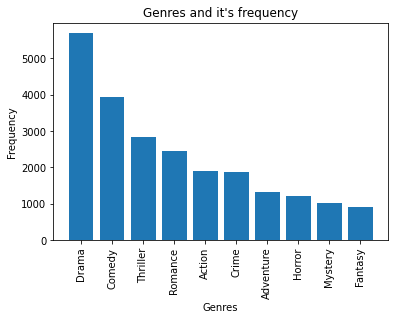

In [70]:
result = genredf.sum()
result = result.sort_values(ascending=False)

x = result.index[:10]
y = result[:10]
plt.bar(x,y)
plt.title("Genres and it's frequency")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

There are 24 genres in total and the most popular one is Drama.